In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def tridiag_matrix(x, N):
    U = lambda x: x ** 2 / 2
    h = x[1] - x[0]
    a = np.array([-1. / (2 * h ** 2)] * N)
    c = np.copy(a)
    a[0] = 0
    c[N - 1] = 0
    b = 1. / h ** 2 + U(x)
    return a, b, c


def sweep_tridiag_matrix(a, b, c, d, N):
    x = np.array([0.] * N)
    for j in range(1, N):
        b[j] -= a[j] / b[j - 1] * c[j - 1]
        d[j] -= a[j] / b[j - 1] * d[j - 1]
        a[j] = 0
    x[N - 1] = d[N - 1] / b[N - 1]
    for i in range(N - 2, -1, -1):
        x[i] = 1 / b[i] * (d[i] - c[i] * x[i + 1])
    return x

def normalization(psi, h):
    return np.sqrt(np.sum(psi[:-1]**2 + psi[1:]**2)*h/2)

In [41]:
def inverse_iterations_method(initial, x, N, levels, iterations=10):
    eigenvector = np.copy(initial)
    eigenvalue = 0
    a, b, c = tridiag_matrix(x, N)
    e = 0
    h = x[1] - x[0]
    while True:
        previous_eigenvector = eigenvector/normalization(eigenvector,h)
        eigenvector = sweep_tridiag_matrix(np.copy(a), np.copy(b), np.copy(c), np.copy(previous_eigenvector), N)
        eigenvalue = normalization(previous_eigenvector,h) / normalization(eigenvector,h)
        if np.abs(e-eigenvalue) < 1e-7:
            break
        e = eigenvalue
    eigenvector /= normalization(eigenvector, h)
    return eigenvalue, eigenvector

E: 0.4999874774853003


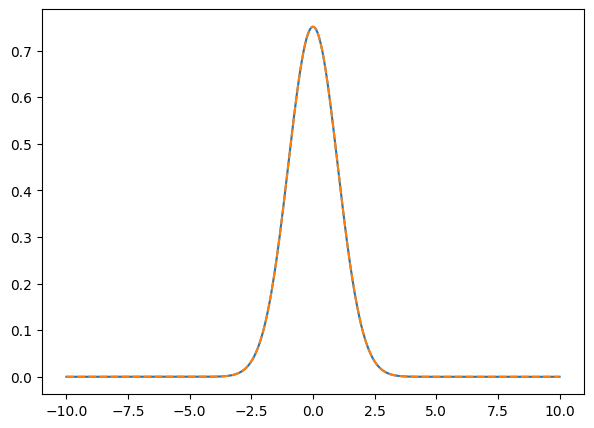

In [42]:
N = 1000
a = -10
b = 10
levels = 2
x = np.linspace(a, b, N)
initial = np.random.RandomState(2).random_sample(x.shape)
E, psi = inverse_iterations_method(initial, x, N, levels)

plt.figure(figsize=(7, 5), dpi=100)
print(f'E: {E}')
plt.plot(x, psi)
plt.plot(x, (np.pi)**(-1/4)*np.exp(-x**2/2), '--')
plt.show()
